In [1]:
import matplotlib.pyplot as plt
import numpy as np
from traffic_template import *

plt.style.use('seaborn')

### Flowrate

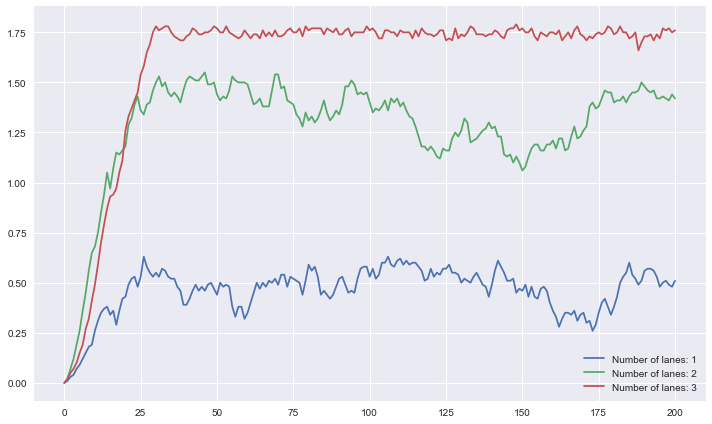

In [42]:
# Simulation parameters
numCars = 18
roadLength = 100
vmax = 10
sigma = 0
lanes_values = [1, 2, 3]
p = 0.25
right_overtaking = True

# Run simulation
plt.figure(figsize=(10, 6))
for lanes in lanes_values:
    cars = Cars(numCars=numCars, roadLength=roadLength, lanes=lanes, vmax=vmax, sigma=sigma)
    simulation = Simulation(cars)
    simulation.run(propagator=MyPropagator(p=p, right_overtaking=right_overtaking), numsteps=200)

    data = simulation.obs

    plt.plot(data.time, data.flowrate, label=f"Number of lanes: {lanes}")


plt.legend()
plt.tight_layout()
plt.show()


### Lane occupation

In [ ]:
# Histogram over lane occupation

### Fundamental diagrams

1/3
2/3
3/3


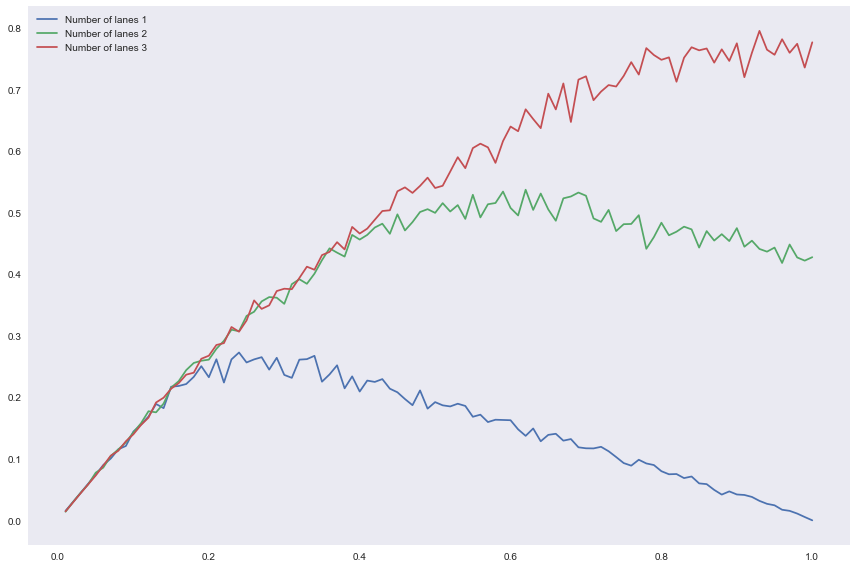

In [45]:
numCars_values = np.arange(1, 101, 1)
roadLength = 100
car_density_values = numCars_values/roadLength
vmax = 2
sigma = 0
lanes_values = [1, 2, 3]
p = 0.5

plt.figure(figsize=(12, 8))
results = []
for i, lanes in enumerate(lanes_values):
    print(f"{i+1}/{len(lanes_values)}")
    flowrate_values = []
    for numCars in numCars_values:
        cars = Cars(numCars=numCars, roadLength=roadLength, lanes=lanes, vmax=vmax, sigma=sigma)
        simulation = Simulation(cars)
        simulation.run(propagator=MyPropagator(p=p))

        data = simulation.obs

        avg_flowrate = np.mean(data.flowrate[-50:])

        flowrate_values.append(avg_flowrate)
    results.append(flowrate_values)
time = data.time

for fr, lanes in zip(results, lanes_values):
    plt.plot(car_density_values, fr, label=f"Number of lanes {lanes}")

plt.grid()
plt.legend()
plt.tight_layout()